In [15]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error





url = "https://raw.githubusercontent.com/milenabel/datamining_finalproject/main/data/weatherData_NL.csv"
data = pd.read_csv(url)
x = data[['Rel Hum_%', 'Wind Speed_km/h', 'Press_kPa']]
y = data['Temp_C']
clf = Ridge(alpha=1)
clf.fit(x.values,y.values)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle=False)
n,m = X_train.shape
x0 = np.ones((n, 1))
X_train = np.hstack((x0, X_train))

n,m = X_test.shape
x0 = np.ones((n, 1))
X_test = np.hstack((x0, X_test))


clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print(mean_squared_error(y_test, y_predict))

79.23842776179666


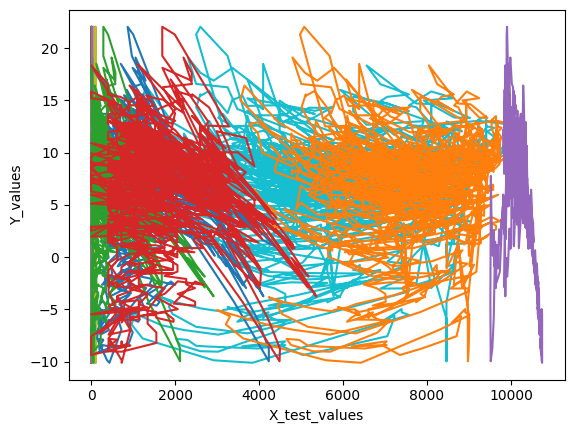

In [8]:
import matplotlib.pyplot as plt




plt.plot(X_test, y_predict)
  # naming the x axis
plt.xlabel('X_test_values')
# naming the y axis
plt.ylabel('Y_values')
  
# giving a title to my graph
  
# function to show the plot
plt.show()


In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from numpy.linalg import inv
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Load entire dataset
url = "https://raw.githubusercontent.com/milenabel/datamining_finalproject/main/data/weatherData_NL.csv"
data = pd.read_csv(url)
X = data[['Rel Hum_%', 'Wind Speed_km/h', 'Press_kPa']]
y = data['Temp_C']#Make a train-test split with 20% of the data in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
shuffle=False)
#Make 5 train-test splits of the data
#Because we chose 5 folds, each test set will consist of 20% of the data
n_splits = 5
clf = Ridge(alpha=1)
clf.fit(x.values,y.values)
kf = KFold(n_splits=n_splits)
kf.get_n_splits(X)
total = 0

for i, (train_index, test_index) in enumerate(kf.split(X)):
  fold_train_X = X.iloc[train_index]
  fold_train_y = y[train_index]
  n,m = fold_train_X.shape
  x0 = np.ones((n, 1))
  fold_train_X = np.hstack((x0, fold_train_X))


  fold_test_X = X.iloc[test_index]
  fold_test_y = y[test_index]
  n,m = fold_test_X.shape
  x0 = np.ones((n, 1))
  fold_test_X = np.hstack((x0, fold_test_X))
  
  
  if(len(fold_train_y) > len(fold_train_X)):
    fold_train_y = fold_train_y[ : -1]
  if(len(fold_train_X) > len(fold_train_y)):
    fold_train_X = fold_train_X[ : -1]
  if(len(fold_test_X) < len(fold_test_y)):
    fold_test_y = fold_test_y[ : -1]

  if(len(fold_test_X) > len(fold_test_y)):
    fold_test_X = fold_test_X[ : -1]  
  
  clf.fit(fold_train_X, fold_train_y)
  y_predict = clf.predict(fold_test_X)
  
  total = total + mean_squared_error(fold_test_y, y_predict)
  

print(total)
print(total/5)


811.204420024841
162.24088400496822
